# Introduction to data wrangling using _`pandas`_.

This notebook is used as a tutorial version of the `05_pandas_wrangle.ipynb` notebook, which contains the complete version of this notebook. For this expercise, we will utilize two files (listed below) from the 'Brazilian E-Commerce Public Dataset' originally posted on [Kaggle]( https://www.kaggle.com/olistbr/brazilian-ecommerce). We will read these datasets from the github repository for this class.

### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Set-up

In [2]:
# full path of the 'orders' dataset
orders_file = pd.read_csv(r"C:\Users\kylew\OneDrive\Documents\MDA\Spring 2024\Data Mining (DAPT 631)\Data\olist_orders_dataset.csv", encoding='ISO-8859-1')
# full path of the 'customer' dataset
cust_file = pd.read_csv(r"C:\Users\kylew\OneDrive\Documents\MDA\Spring 2024\Data Mining (DAPT 631)\Data\olist_customers_dataset.csv", encoding='ISO-8859-1')

### Read data

In [8]:
orders = orders_file

orders.shape

(99441, 8)

In [9]:
# let's take a look at order_status 

orders['order_purchase_timestamp'].head()

0    2017-10-02 10:56:33
1    2018-07-24 20:41:37
2    2018-08-08 08:38:49
3    2017-11-18 19:28:06
4    2018-02-13 21:18:39
Name: order_purchase_timestamp, dtype: object

For this exercise, we will use only four columns from this data frame: `order_id`, `customer_id`, `order_status`, `order_purchase_date`. Let's drop the other columns.

In [ ]:
# drop unnecessary columns

drop_vars = ['order_approved_at', 'order_delivered_carrier_date', 
             'order_delivered_customer_date', 'order_estimated_delivery_date']

orders = 

In [ ]:
# check column types



<tr>
    <td><img src=https://imgs.xkcd.com/comics/iso_8601_2x.png width=400></td>
    <td><img src=https://img.devrant.com/devrant/rant/r_1791863_FFo6e.jpg width=482></td>
</tr>

### Convert `order_purchase_timestamp` from `object` to `datetime`

In [12]:
# date-time conversion

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [13]:
# for this exercise, we won't use the time-stamp
# let's convert the order purchase date-timestamps into dates

orders['order_purchase_date'] = orders['order_purchase_timestamp'].dt.date

In [14]:
# view these two columns
orders[['order_purchase_timestamp', 'order_purchase_date']].head()

,order_purchase_timestamp,order_purchase_date
0,2017-10-02 10:56:33,2017-10-02
1,2018-07-24 20:41:37,2018-07-24
2,2018-08-08 08:38:49,2018-08-08
3,2017-11-18 19:28:06,2017-11-18
4,2018-02-13 21:18:39,2018-02-13


### Daily order volumes

In [15]:
# group by order date and count the number of orders (for each date)

order_counts = orders.groupby('order_purchase_date')['order_id'].count()

order_counts.head()

order_purchase_date
2016-09-04    1
2016-09-05    1
2016-09-13    1
2016-09-15    1
2016-10-02    1
Name: order_id, dtype: int64

The `groupby()` function with a summary function like `count()` returns an indexed pandas dataframe. 

_`pandas`_ uses a similar structure like **SQL** for aggregating data. Here's an analogous SQL query:

`CREATE TABLE order_counts as`

`SELECT order_purchase_date, count(order_id)`

`FROM orders`

`GROUP BY order_purchase_date;`

*Checkout [pandasql](https://pypi.org/project/pandasql/).*

Plot the daily order volume.

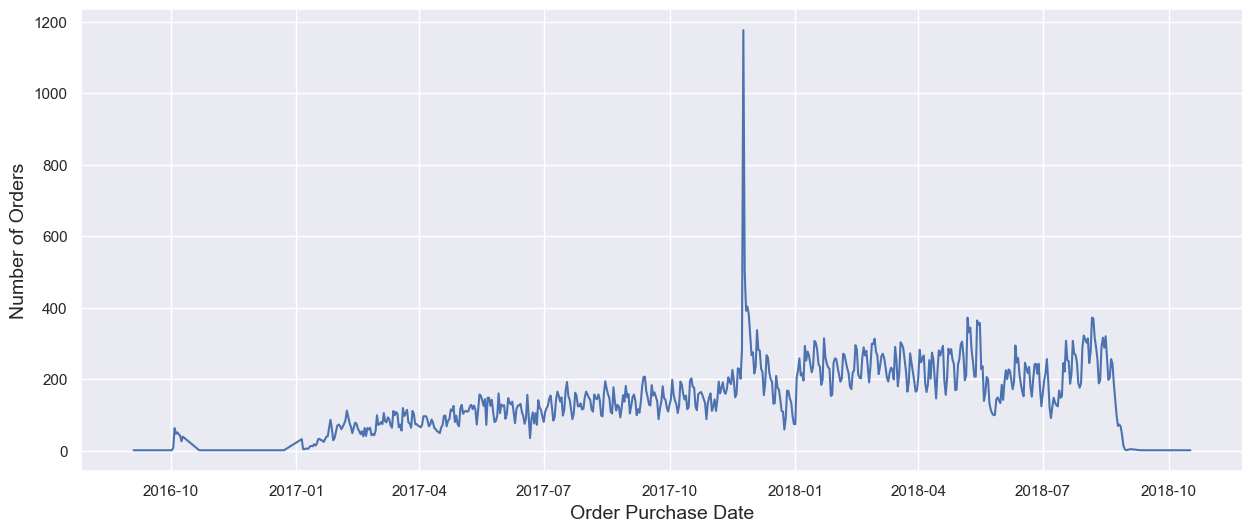

In [18]:
# set style
sns.set(style='darkgrid')

# adjust the plot size
plt.figure(figsize=[15, 6])

# line plot
sns.lineplot(x=order_counts.index,
             y=order_counts.values)

# assign axis labels
plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('Order Purchase Date', fontsize=14);

<Axes: xlabel='order_purchase_date', ylabel='order_id'>

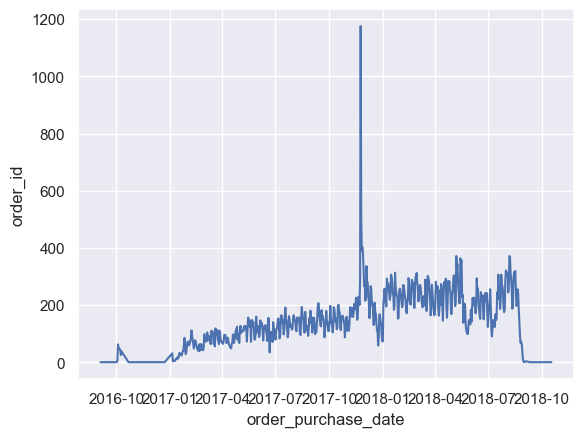

In [20]:
sns.lineplot(order_counts) #shortcut since it is only a simple data, not a dataframe

Some of the recent data seem to be missing or incomplete. Let's take a closer look.

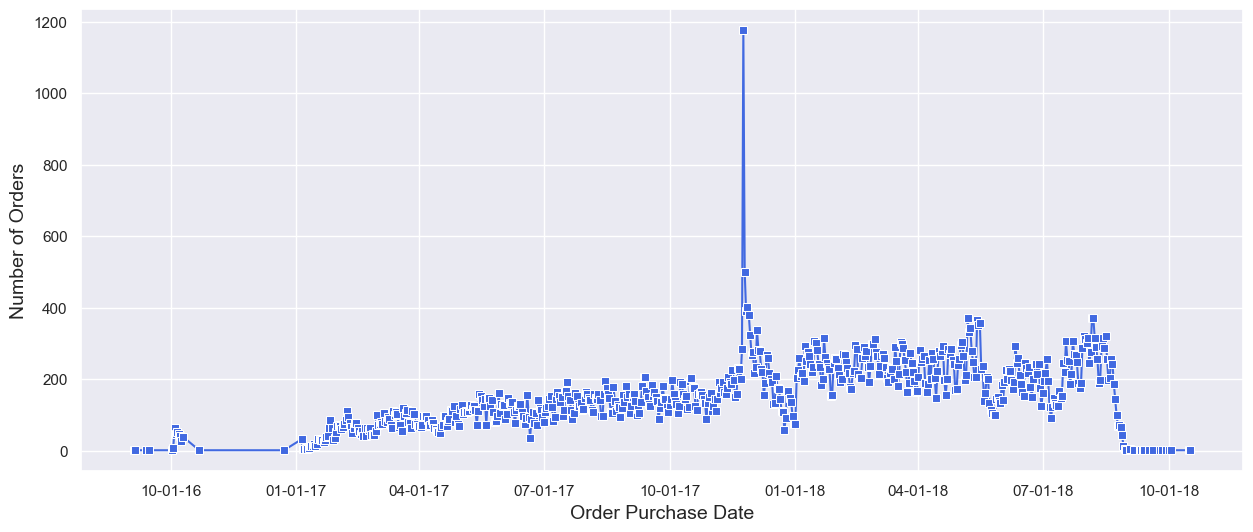

In [21]:
import matplotlib.dates as mdates

# set style
sns.set(style='darkgrid')

# adjust the plot size
fig, ax = plt.subplots(figsize=[15, 6])

# line plot
sns.lineplot(x=order_counts.index, 
             y=order_counts.values, 
             marker='s', 
             color='royalblue')

# assign axis labels
plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('Order Purchase Date', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'));

It appears that perhaps 8/22 is the most recent day with complete data. We should discard the data after that date.

In [ ]:
# size of the dataset before applying the date filter
print(orders.shape)

In [23]:
from datetime import date

#max_date = 

# apply the date filter
orders[orders['order_purchase_date'] == date(2017, 11, 24)]['order_status']\
    .value_counts(normalize=True)

order_status
delivered      0.975340
shipped        0.010204
unavailable    0.008503
invoiced       0.003401
processing     0.002551
Name: proportion, dtype: float64

In [ ]:
# size of the dataset after applying the date filter
print(orders.shape)

In [ ]:
# check


[Doveryay, no proveryay: Trust, but verify.](https://en.wikipedia.org/wiki/Trust,_but_verify)

There's a huge spike in the number of orders sometime around November/December 2017. Let's identify that specific day.

In [ ]:
# find the date associated with the maximum daily order volume



<Axes: >

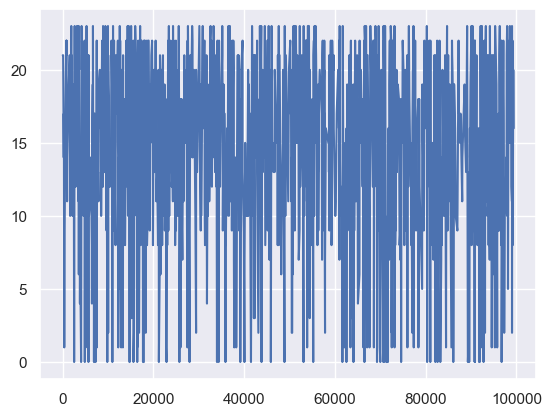

In [27]:
# let's check the order_status for these orders

orders[orders['order_purchase_date'] == date(2017, 11, 24)]['order_purchase_timestamp'].dt.hour.value_counts()

In [ ]:
# let's take a look at the order hour (hour of day) for these orders



<Axes: xlabel='order_purchase_timestamp'>

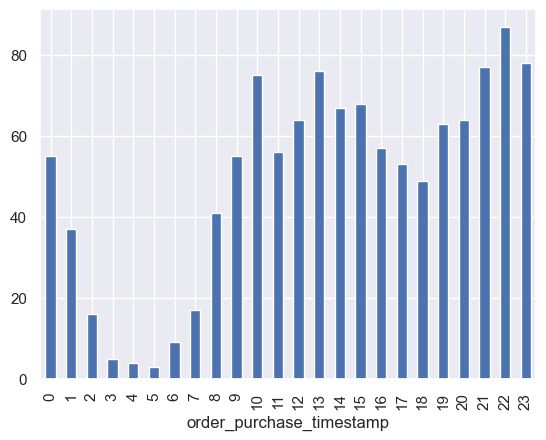

In [28]:
# let's plot it

orders[orders['order_purchase_date'] == date(2017, 11, 24)]['order_purchase_timestamp']\
    .dt.hour.value_counts().sort_index().plot(kind='bar')

This type of finding would be a good opportunity to talk with the stakeholders to find out the reason(s) behind this anomaly/spike. Here are some potential reasons for this spike: a big one-day sale event (Thanksgiving), big product launch, platform launch (e.g., a new marketplace) on that day.

### Is there a monthly seasonality in the order volumes?

In [29]:
# extract year from the order date

orders['order_year'] = orders['order_purchase_timestamp'].dt.year

orders['order_year'].value_counts()

order_year
2018    54011
2017    45101
2016      329
Name: count, dtype: int64

Note: `value_counts()` sorts the results by using the counts in a descending order.

In [32]:
# extract month from the order date

orders['order_month'] = orders['order_purchase_timestamp'].dt.month

orders['order_month'].value_counts()

order_month
8     10843
5     10573
7     10318
3      9893
6      9412
4      9343
2      8508
1      8069
11     7544
12     5674
10     4959
9      4305
Name: count, dtype: int64

In [36]:
# group by year and month to get the number of orders for each combination
orders.groupby(['order_year', 'order_month'])['order_id'].count()

order_year  order_month
2016        9                 4
            10              324
            12                1
2017        1               800
            2              1780
            3              2682
            4              2404
            5              3700
            6              3245
            7              4026
            8              4331
            9              4285
            10             4631
            11             7544
            12             5673
2018        1              7269
            2              6728
            3              7211
            4              6939
            5              6873
            6              6167
            7              6292
            8              6512
            9                16
            10                4
Name: order_id, dtype: int64

In [37]:
# reset index to make it a single-index (instead of multi-index) data frame

orders.groupby(['order_year', 'order_month'])['order_id'].count().reset_index()

,order_year,order_month,order_id
0,2016,9,4
1,2016,10,324
2,2016,12,1
3,2017,1,800
4,2017,2,1780
5,2017,3,2682
6,2017,4,2404
7,2017,5,3700
8,2017,6,3245
9,2017,7,4026


In [ ]:
# save the groupby results in a data frame

order_counts_by_month = orders.groupby(['order_year', 'order_month'])['order_id'].count().reset_index()

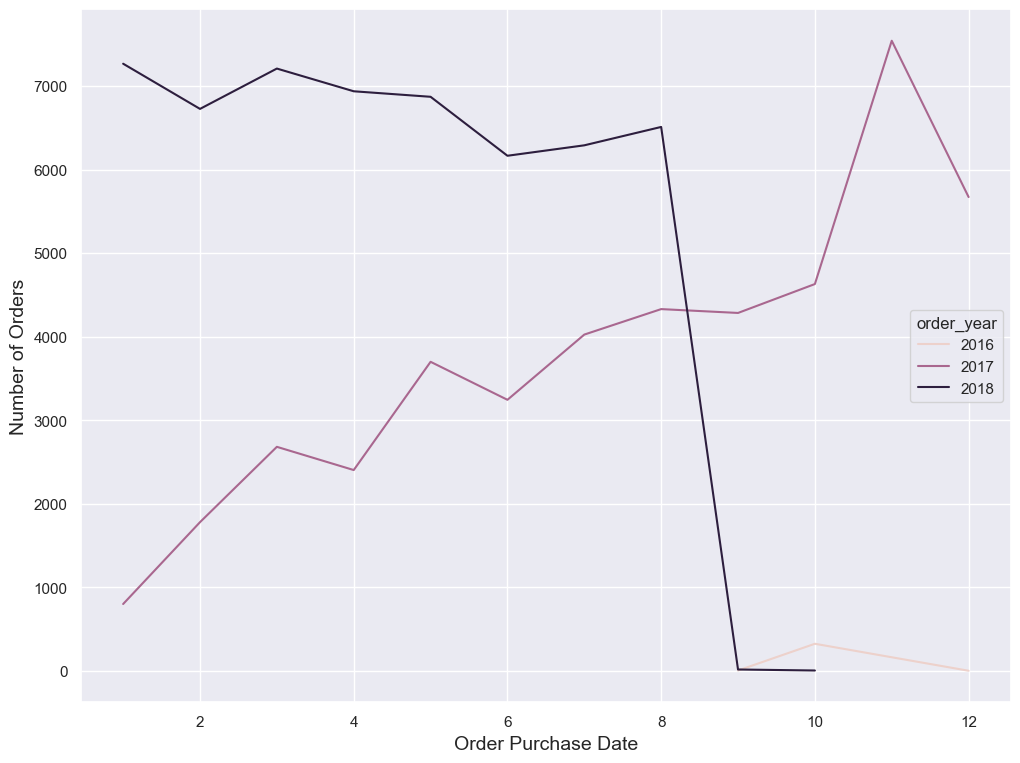

In [39]:
# plot the order volumes by year and month

sns.set(style='darkgrid')

plt.figure(figsize=[12, 9])

sns.lineplot(x = 'order_month', y = 'order_id', hue = 'order_year', data = order_counts_by_month)

plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('Order Purchase Date', fontsize=14);

The data from 2018 in incomplete (available until August), and only three months' worth of data is available from 2017. But based on the available data, there doesn't appear to be any strong seasonality effect over months. 

### Let's take a look at some customer-level patterns

The `customer_id` that's available in the `olist_orders_dataset` file is *not* unique for each customer. The `olist_customers_dataset` file contains the unique identifier for each customer.

In [42]:
# read the file that contains the unique customer identifier

cust = cust_file

cust.shape

(99441, 5)

In [43]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# let's keep only the following two columns: customer_id, customer_unique_id

cust = 

Merge the orders dataframe with the customer dataframe to append `customer_unique_id` to the orders data.

In [ ]:
# merge orders and cust dataframes

orders = 

_`pandas`_ uses a similar structure like **SQL** for joining (merging) dataframes. Here's an analogous SQL query:

`CREATE TABLE orders as`

`SELECT a.*, b.*`

`FROM orders as a`

`JOIN cust as b`

`ON a.customer_id = b.customer_id;`

Note that an `inner` join is fine here because customers that are present in one dataframe are all also present in the other dataframe.

In [ ]:
# confirm how many unique customer IDs we had in the 'orders' dataset



In [ ]:
# number of orders per customer



Another approach, to get the order counts by customer, is to use `groupby()`.

In [ ]:
# number of orders per customer using groupby



Alternatively, use `orders.groupby('customer_unique_id')['order_id'].count()`.

In [ ]:
# save these counts (number of orders) in a new dataframe
cust_orders = orders.groupby('customer_unique_id').size().reset_index()

cust_orders.head()

In [ ]:
# rename the size/count column
cust_orders = 

cust_orders.head()

In [ ]:
# number of customers by their order volume

cust_orders.orders.value_counts(sort=False)

Most customers ordered only once :(

In [ ]:
# % of customers by their order volume

cust_orders['orders'].value_counts() / len(cust_orders)